# Pratical assignment 2 : k-Nearest Neighbors

CHEN Eric, POMBET Charles

In [1]:
from sklearn.datasets import make_blobs
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

## 1) k-NN classification : Synthetic dataset

### Question 1 

In [2]:
def data_set(sigma):
    mu_0 = [-1, 0]
    mu_1 = [1, 0]
    mu_2 = [0, 1]
    X, y = make_blobs(n_samples=300, centers=[mu_0, mu_1, mu_2], cluster_std=[sigma] * 3)
    return X,y

In [3]:
X, y = data_set(0.10)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)

In [4]:
def distance(x1, x2):
    distance = sum([(x1[i]-x2[i])**2 for i in range(x1.shape[0])])**0.5
    return distance

In [5]:
def get_neighbors(x, data, nb_neighbors):
    neighbors_set = []
    distances = []
    r = []
    n = data.shape[0]
    for i in range(n):
        dist = distance(x, data[i])
        distances.append([i, dist])
    distances.sort(key= lambda tup: tup[1])
    for i in range(nb_neighbors):
        index = distances[i][0]
        r.append(index)
        neighbors_set.append(data[index])
    return r

In [6]:
def predict(x, data, y, nb_neighbors):
    r = get_neighbors(x, data, nb_neighbors)
    nb_label = [0 for i in range(np.unique(y).shape[0])]
    for i in range(nb_neighbors):
        nb_label[y[r[i]]] = nb_label[y[r[i]]] + 1 
    indices = [i for i, j in enumerate(nb_label) if j == max(nb_label)]
    prediction = random.choice(indices)
    return np.array(prediction)

In [7]:
def knn(data, y, test, nb_neighbors):
    predictions = []
    for element in test:
        y_pred = predict(element, data, y, nb_neighbors)
        predictions.append(y_pred)
    return np.array(predictions)

In [8]:
def plot_decision(X,y,nb_neighbors):
    plt.figure()

    h = 0.2
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    xy = np.c_[xx.ravel(), yy.ravel()]

    Z = knn(X,y,xy,nb_neighbors).reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha = 0.4)
    
    lab0 = np.where(y == 0)[0]
    lab1 = np.where(y == 1)[0]
    lab2 = np.where(y == 2)[0]
    plt.scatter(X[lab0,0], X[lab0,1], c='r')
    plt.scatter(X[lab1,0], X[lab1,1], c='b')
    plt.scatter(X[lab2,0], X[lab2,1], c='g')
    plt.title("Decision boundary for K = " + str(nb_neighbors))
    plt.show()

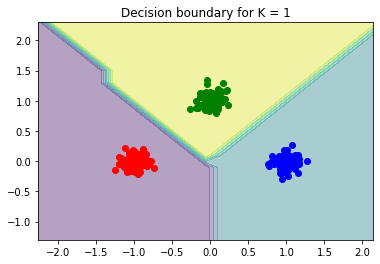

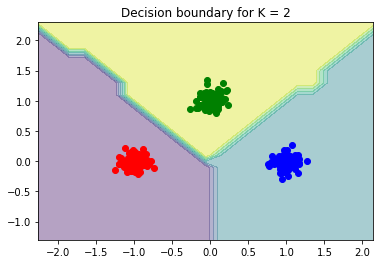

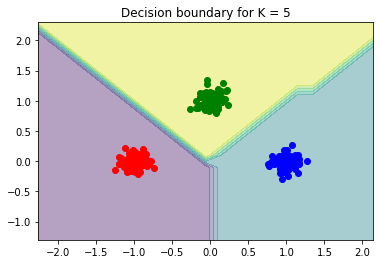

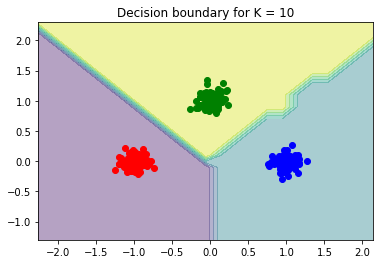

In [9]:
K_set = [1, 2, 5, 10]
for k in K_set:
    plot_decision(X,y,k)

**In our case, when K increases, we observe that the decision boundary does not change very much. Generally, choosing a small value for K leads to overfitting (sensitive to noise) while a large value for K leads to underfitting.**

### Question 2 

In [10]:
def compute_error(X_train, y_train, X_test, y_test, nb_neighbors):
    error = 0
    for i in range(X_test.shape[0]):
        y_pred = predict(X_test[i], X_train, y_train, nb_neighbors)
        d = y_test[i]
        if (y_pred != d):
            error += 1
    return error/X_test.shape[0]

In [11]:
def compute_std(error, avg_error):
    std = (sum([(error[i]-avg_error)**2 for i in range(len(error))])/len(error))**0.5
    return std

In [12]:
def plot_err_std(K, sigma_set):
    error_set = []
    std_set = []
    for sigma in sigma_set:
        err = []
        for i in range(50):
            X, y = data_set(sigma)
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=42)            
            error = compute_error(X_train, y_train, X_test, y_test, K)
            err.append(error)
        avg_error = sum(err)/50
        error_set.append(avg_error)
        std = compute_std(err, avg_error)
        std_set.append(std)
    print("For K = " + str(K) + " :")
    print(" ")
    print("Average Error : ")
    print(error_set)
    print(" ")
    print("Standard deviation : ")
    print(std_set)
    plt.figure()
    plt.bar(np.arange(len(sigma_set)), error_set, yerr=std_set)
    plt.title("For K = " + str(K)+ " : Errors depending on sigma")
    plt.xlabel('Sigma')
    plt.ylabel('Average Error')
    plt.xticks(np.arange(len(sigma_set)), sigma_set)
    plt.show()

For K = 1 :
 
Average Error : 
[0.0, 0.0, 0.0004, 0.0054]
 
Standard deviation : 
[0.0, 0.0, 0.0019595917942265423, 0.006988562083862461]


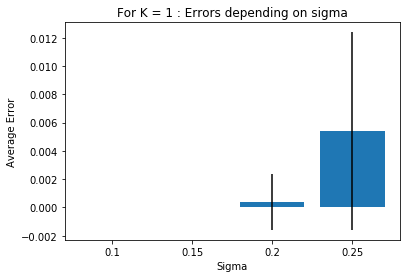

For K = 2 :
 
Average Error : 
[0.0, 0.0, 0.001, 0.005800000000000002]
 
Standard deviation : 
[0.0, 0.0, 0.00360555127546399, 0.007507329751649386]


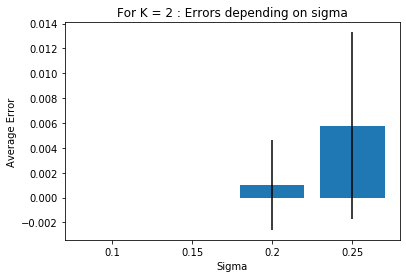

For K = 5 :
 
Average Error : 
[0.0, 0.0, 0.0006, 0.0032000000000000006]
 
Standard deviation : 
[0.0, 0.0, 0.002374868417407582, 0.005075431016179805]


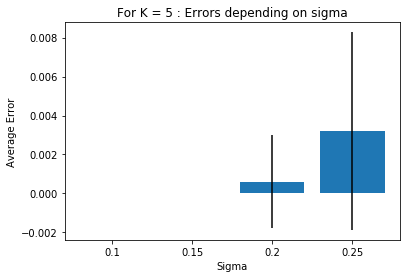

For K = 10 :
 
Average Error : 
[0.0, 0.0, 0.0004, 0.0036000000000000003]
 
Standard deviation : 
[0.0, 0.0, 0.0019595917942265423, 0.0052000000000000015]


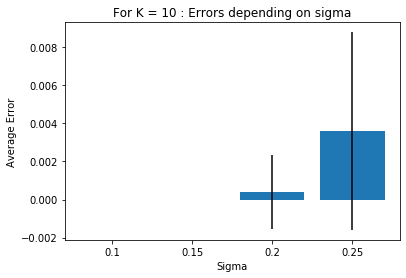

In [13]:
sigma_set = [0.10, 0.15, 0.20, 0.25]
K_set = [1, 2, 5, 10]
for k in K_set:
    plot_err_std(k, sigma_set)

**With a small $\sigma^{2}$ ($\sigma^{2}$ < 0.2), there is no error.**

## 2) k-NN regression : Szeged-weather dataset

### Question 1

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('weatherHistory.csv')

In [16]:
X = df['Temperature (C)']
Y = df['Humidity']
C = df['Apparent Temperature (C)']

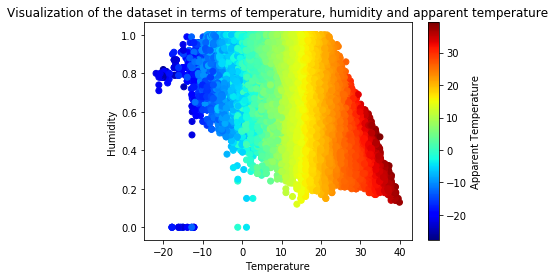

In [18]:
import matplotlib as mpl
plt.figure()
N = len(round(C).unique())
# define the colormap
cmap = plt.cm.jet
# extract all colors from the .jet map
cmaplist = [cmap(i) for i in range(cmap.N)]
# create the new map
cmap = cmap.from_list('Custom cmap', cmaplist, cmap.N)

# make the scatter
scat = plt.scatter(X, Y, c=C, cmap=cmap)
# create the colorbar
cb = plt.colorbar(scat, spacing='proportional')
cb.set_label('Apparent Temperature')
plt.xlabel('Temperature')
plt.ylabel('Humidity')
plt.title('Visualization of the dataset in terms of temperature, humidity and apparent temperature')
plt.show()

### Question 2

In [19]:
def compute_average(x, data, y, nb_neighbors):
    r = get_neighbors(x, data, nb_neighbors)
    avg = 0
    for i in range(nb_neighbors):
        avg = avg + y[r[i]]  
    avg = avg/nb_neighbors
    return avg

In [20]:
def knn_regression(X_train, y_train, X_test, nb_neighbors):
    predictions = []
    for element in X_test:
        y_pred = compute_average(element, X_train, y_train, nb_neighbors)
        predictions.append(y_pred)
    return predictions

In [21]:
def compute_error_reg(X_train, y_train, X_test, y_test, nb_neighbors):
    error = 0
    for i in range(X_test.shape[0]):
        y_pred = compute_average(X_test[i], X_train, y_train, nb_neighbors)
        d = y_test[i]
        if(y_pred != d):
            error += 1
    error = error/X.shape[0]
    return error

Average Error : 
[0.182, 0.195, 0.2, 0.197, 0.2, 0.2, 0.2, 0.199, 0.2, 0.2]
 
Standard deviation : 
[0.006782329983125274, 0.0, 0.0, 0.00244948974278318, 0.0, 0.0, 0.0, 0.0020000000000000018, 0.0, 0.0]


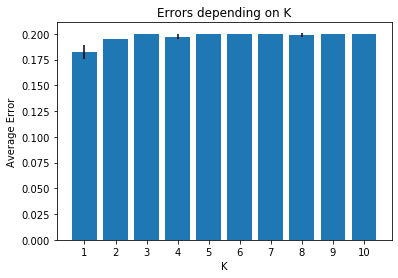

In [22]:
K = [1,2,3,4,5,6,7,8,9,10]
err_set = []
std_set = []
for k in K:
    samples = df[0:200]
    X = np.array(samples[['Temperature (C)', 'Humidity']])
    y = np.array(samples['Apparent Temperature (C)'])
    error = []
    for i in range(5):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5)
        err = compute_error_reg(X_train, y_train, X_test, y_test, k)
        error.append(err)
    avg_error = sum(error)/5
    std = compute_std(error, avg_error)
    err_set.append(avg_error)
    std_set.append(std)
print("Average Error : ")
print(err_set)
print(" ")
print("Standard deviation : ")
print(std_set)
plt.figure()
plt.bar(np.arange(len(K)), err_set, yerr=std_set)
plt.title("Errors depending on K")
plt.xlabel('K')
plt.ylabel('Average Error')
plt.xticks(np.arange(len(K)), K)
plt.show()

## 3) k-NN classification : MNIST dataset  

### Question 1

In [23]:
import scipy.io
train = scipy.io.loadmat("data/data_app.mat")
test = scipy.io.loadmat("data/data_test.mat")

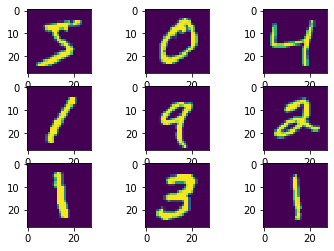

In [24]:
fig, axs = plt.subplots(3,3)
index = 0
for ax in axs.flatten():
    ax.imshow(train['x'][index].reshape(28,28))
    index = index + 1

In [25]:
X_train = np.array([image.astype(float)/255 for image in train["x"]])
y_train = train["S"]
X_test = np.array([image.astype(float)/255 for image in test["x"]])
y_test = test["S"]

## Change the label 10 to the label 0
for i in range(y_train.shape[0]):
    if (y_train[i] == 10):
        y_train[i] = 0
for i in range(y_test.shape[0]):
    if (y_test[i] == 10):
        y_test[i] = 0

In [26]:
def plot_histo(y, dataset_name):
    n,p = y.shape
    label = [0 for i in range(10)]
    for i in range(n):
        for j in range(p):
            label[y[i,j]] = label[y[i,j]] + 1
    abscissa = [i for i in range(10)]
    plt.bar(abscissa, label)
    plt.title("Histogram of the labels for the " + dataset_name)
    plt.show()

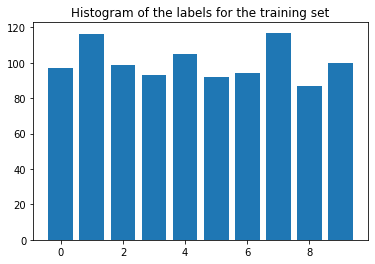

In [27]:
plot_histo(y_train, "training set")

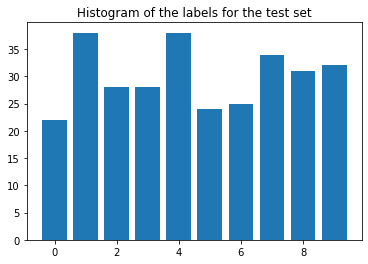

In [28]:
plot_histo(y_test, "test set")

**For each set, we observe that the number of labels is not the same. However, it seems that the training set and the test set have more or less the same distribution.**

### Question 2

In [31]:
K = [1, 3, 5]
for k in K:
    error = compute_error(X_train, y_train.reshape(-1), X_test, y_test.reshape(-1), k)
    print("For K = " + str(k) + " : ")
    print("Error rate = ")
    print(error)
    print(" ")

For K = 1 : 
Error rate = 
0.15333333333333332
 
For K = 3 : 
Error rate = 
0.19333333333333333
 
For K = 5 : 
Error rate = 
0.17333333333333334
 


### Question 3

In [36]:
def confusion_matrix(y_test, y_pred):
    conf_mat = np.zeros((10,10))
    for i in range(10):
        for j in range(10):
            conf_mat[i,j] = len(y_test[(y_test == i) * (y_pred == j)]) / len(y_test[y_test == i])
    return conf_mat

In [37]:
predictions = knn(X_train, y_train.reshape(-1), X_test, 3)
confusion_mat = confusion_matrix(y_test.reshape(-1), predictions)

In [38]:
print(confusion_mat)

[[0.90909091 0.         0.         0.         0.         0.04545455
  0.04545455 0.         0.         0.        ]
 [0.         1.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.07142857 0.07142857 0.64285714 0.         0.         0.07142857
  0.03571429 0.03571429 0.03571429 0.03571429]
 [0.07142857 0.         0.         0.57142857 0.         0.25
  0.         0.         0.03571429 0.07142857]
 [0.         0.07894737 0.02631579 0.         0.71052632 0.
  0.05263158 0.         0.         0.13157895]
 [0.04166667 0.         0.         0.08333333 0.         0.75
  0.04166667 0.         0.08333333 0.        ]
 [0.         0.08       0.         0.         0.         0.
  0.92       0.         0.         0.        ]
 [0.02941176 0.         0.         0.02941176 0.02941176 0.02941176
  0.         0.85294118 0.         0.02941176]
 [0.         0.03225806 0.03225806 0.         0.         0.03225806
  0.03225806 0.         0.80645161 0.06451613]
 

**The best model for the confusion matrix would be the identity matrix. However, here it is not really the case**